Creating RawArray with float64 data, n_channels=5, n_times=2560
    Range : 0 ... 2559 =      0.000 ...     9.996 secs
Ready.
Using matplotlib as 2D backend.


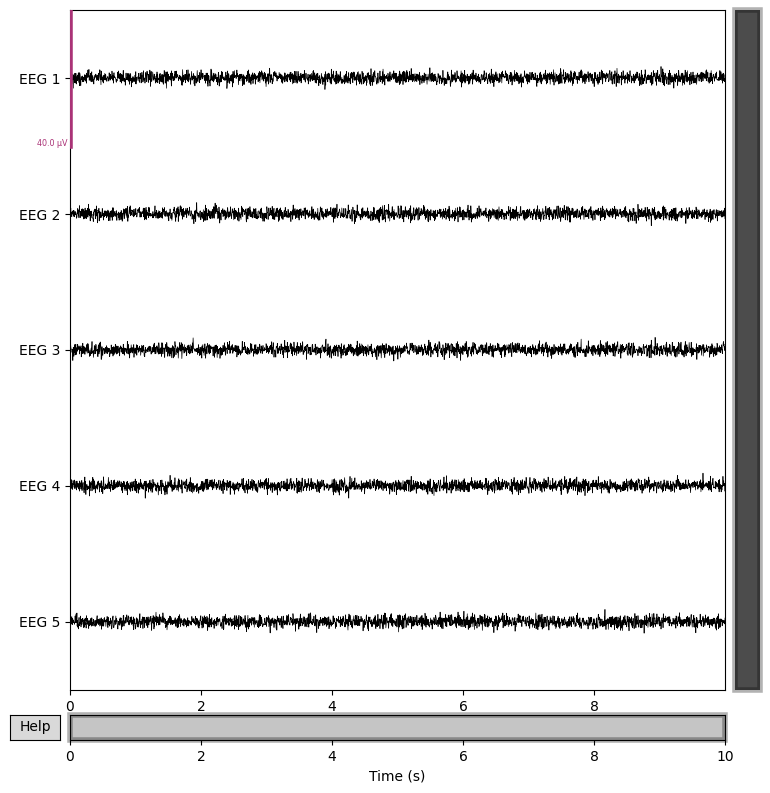

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



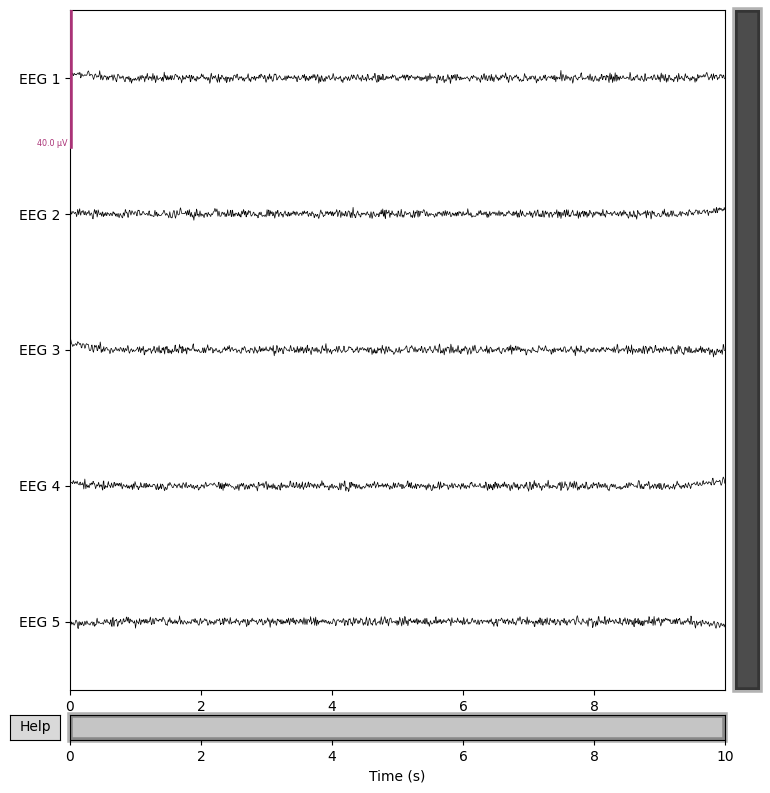

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


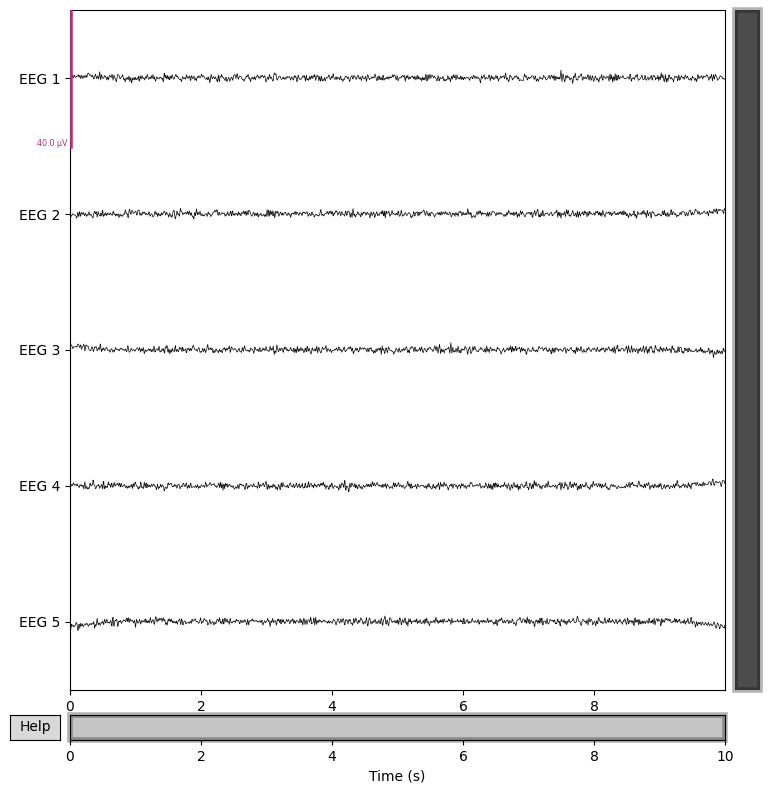

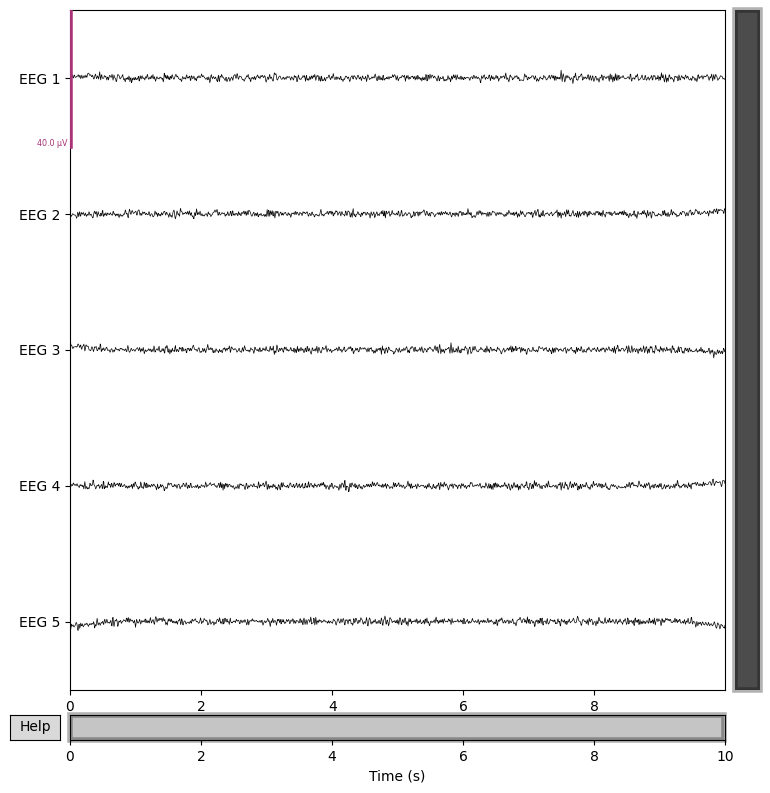

Writing /content/simulated_processed_raw.fif
Closing /content/simulated_processed_raw.fif
[done]


[PosixPath('/content/simulated_processed_raw.fif')]

In [3]:
import numpy as np
import mne
import matplotlib.pyplot as plt

# --- Step 1: Simulate Raw EEG Data
sfreq = 256  # Original sampling frequency (Hz)
times = np.arange(0, 10, 1/sfreq)  # 10 seconds
n_channels = 5  # Simulate 5 EEG channels
data = 1e-6 * np.random.randn(n_channels, len(times))  # Random µV noise

# Channel names and types
ch_names = [f'EEG {i+1}' for i in range(n_channels)]
ch_types = ['eeg'] * n_channels

# Create Info and RawArray object
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data, info)
raw.plot(title='Original Simulated EEG')

# --- Step 2: Apply FIR Bandpass Filter (1–40 Hz)
raw.filter(l_freq=1., h_freq=40., fir_design='firwin')
raw.plot(title='Filtered EEG (1–40 Hz)')

# --- Step 3: Re-reference to Average
raw.set_eeg_reference('average', projection=False)
raw.plot(title='Re-referenced EEG (Average)')

# --- Step 4: Downsample to 128 Hz
raw.resample(128)
raw.plot(title='Resampled EEG (128 Hz)')

# --- Step 5: Save (optional)
raw.save("simulated_processed_raw.fif", overwrite=True)


#Conclusion

In this Experiment, we successfully simulated an EEG dataset and applied key preprocessing steps essential for neural signal analysis. Using Python and the MNE library, we implemented a bandpass FIR filter to isolate relevant frequency components, re-referenced the signals to a common average to reduce spatial noise, and resampled the data to a lower frequency for computational efficiency. These preprocessing techniques are crucial for improving the quality and interpretability of EEG data. The final processed signal is now better suited for downstream tasks such as event detection, feature extraction, or machine learning-based analysis.